In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


%matplotlib inline
sns.set()
le = LabelEncoder()

In [11]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [12]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [13]:
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [14]:
train=train.drop(['PassengerId','Name'],axis=1)
test=test.drop(['PassengerId','Name'],axis=1)

In [15]:
train[['deck', 'num','side']] = train['Cabin'].str.split('/', expand=True)
train=train.drop(['Cabin'],axis=1)
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [16]:
test[['deck', 'num','side']] = test['Cabin'].str.split('/', expand=True)
test=test.drop(['Cabin'],axis=1)
test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck,num,side
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,3,S
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,4,S
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,0,S
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,1,S
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,5,S


In [17]:
all_data = [train, test]

In [19]:
for ds in all_data:
    ds.deck = le.fit_transform(ds.deck)
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,5,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,5,1,S


In [22]:
for ds in all_data:
    ds.side = le.fit_transform(ds.side)
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0,0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,5,0,1
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,0,1
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,0,1
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,5,1,1


In [23]:
for ds in all_data:
    ds.HomePlanet = le.fit_transform(ds.HomePlanet)

In [24]:
for ds in all_data:
    ds.Destination = le.fit_transform(ds.Destination)

In [25]:
train[['CryoSleep', 'VIP','Transported']] = (train[['CryoSleep', 'VIP','Transported']] == True).astype(int)
test[['CryoSleep', 'VIP']] = (test[['CryoSleep', 'VIP']] == True).astype(int)
train[train.VIP.isnull()]

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side


In [26]:
train = train.select_dtypes(include=[np.number]).interpolate().dropna()
test = test.select_dtypes(include=[np.number]).interpolate().dropna()

sum(train.isnull().sum() != 0)

0

In [27]:
train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,side
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1,5,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,1
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,1
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0,0
8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,6,1
8690,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,6,1
8691,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,4,1


In [28]:
test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck,side
0,0,1,2,27.000000,0,0.0,0.0,0.0,0.0,0.0,6,1
1,0,0,2,19.000000,0,0.0,9.0,0.0,2823.0,0.0,5,1
2,1,1,0,31.000000,0,0.0,0.0,0.0,0.0,0.0,2,1
3,1,0,2,38.000000,0,0.0,6652.0,0.0,181.0,585.0,2,1
4,0,0,2,20.000000,0,10.0,0.0,635.0,0.0,0.0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,2,34.000000,0,0.0,0.0,0.0,0.0,0.0,6,1
4273,0,0,2,42.000000,0,0.0,847.0,17.0,10.0,144.0,8,2
4274,2,1,0,42.333333,0,0.0,0.0,0.0,0.0,0.0,3,0
4275,1,0,3,42.666667,0,0.0,2680.0,0.0,0.0,523.0,3,0


In [29]:
x_train = train.drop("Transported", axis=1)
y_train = train["Transported"]
x_test  = test.copy()
x_train.shape, y_train.shape, x_test.shape

((8693, 12), (8693,), (4277, 12))

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

In [32]:
logistic_regr = LogisticRegression()
logistic_regr.fit(x_train, y_train)
logistic_regr_score = round(logistic_regr.score(x_train, y_train) * 100, 5)
logistic_regr_score

78.49994

In [33]:
svc = SVC()
svc.fit(x_train, y_train)
svc_score = round(svc.score(x_train, y_train) * 100, 2)
svc_score

80.24

In [34]:
linear_svc = LinearSVC(max_iter=5000)
linear_svc.fit(x_train, y_train)
linear_svc_score = round(linear_svc.score(x_train, y_train) * 100, 5)
linear_svc_score

78.29288

In [35]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_score = round(knn.score(x_train, y_train) * 100, 5)
knn_score

83.13586

In [36]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
decision_tree_score = round(decision_tree.score(x_train, y_train) * 100, 5)
decision_tree_score

95.34108

In [37]:
rf = RandomForestClassifier(random_state=0,
                            criterion='entropy')
rf.fit(x_train, y_train)
rf_score = round(rf.score(x_train, y_train) * 100, 5)
rf_score

95.34108

In [38]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_score = round(gnb.score(x_train, y_train) * 100, 5)
gnb_score

69.74577

In [39]:
perc = Perceptron()
perc.fit(x_train, y_train)
perc_score = round(perc.score(x_train, y_train) * 100, 5)
perc_score

71.66686

In [40]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
sgd_score = round(sgd.score(x_train, y_train) * 100, 2)
sgd_score

78.7

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
lda_score = round(lda.score(x_train, y_train) * 100, 5)
lda_score

76.37179

In [42]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC',
              'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes',
              'Perceptron', 'Stochastic Gradient Decent', 'LinearDiscriminantAnalysis'],

    'Score': [logistic_regr_score, svc_score, linear_svc_score,
              knn_score,  decision_tree_score, rf_score, gnb_score,
              perc_score, sgd_score, lda_score]
})

models.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,95.34108
5,Random Forest,95.34108
3,KNN,83.13586
1,Support Vector Machines,80.24000
8,Stochastic Gradient Decent,78.70000
0,Logistic Regression,78.49994
2,Linear SVC,78.29288
9,LinearDiscriminantAnalysis,76.37179
7,Perceptron,71.66686
6,Naive Bayes,69.74577


Accuracy: 87 % 



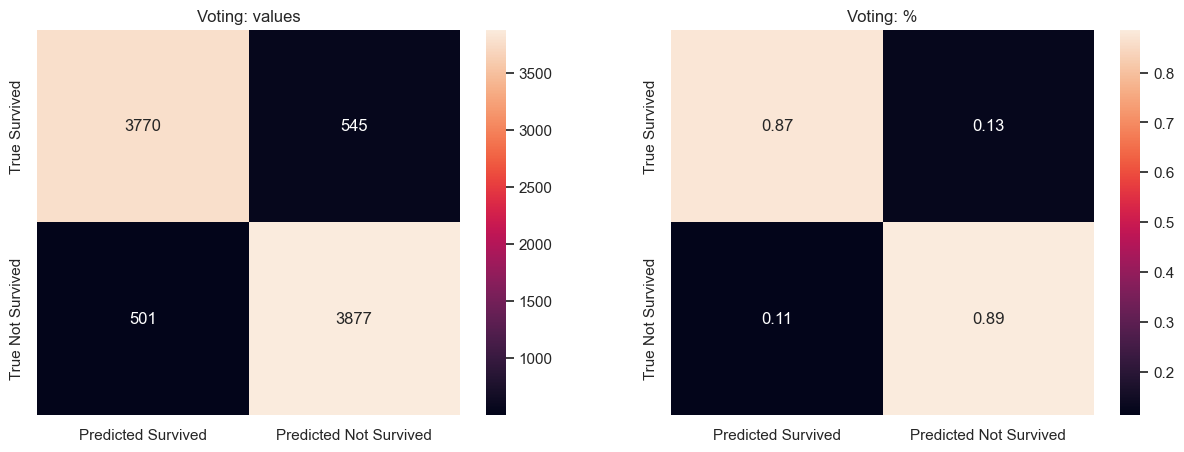

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import VotingClassifier

# 1. Dыбираем модели, включенные в голосование
model1 = RandomForestClassifier()
model2 = SVC(probability=True)
model3 = KNeighborsClassifier()


# 2. Сам "голосующий" классификатор
model = VotingClassifier(estimators=[('perceptron', model1), ('sdg', model2), ('nb', model3)], voting='soft')
model.fit(x_train,y_train)

# 3. Confusion Matrix
y_pred_voter = model.predict(x_train)
acc_voter = round(model.score(x_train, y_train) * 100, 2)
print ("Accuracy: %i %% \n"%acc_voter)

#class_names = ['Survived', 'Not Survived']

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, y_pred_voter)
cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

true_class_names = ['True Survived', 'True Not Survived']
predicted_class_names = ['Predicted Survived', 'Predicted Not Survived']

df_cnf_matrix = pd.DataFrame(cnf_matrix,
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent,
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (15,5))

ax1 = plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')
ax1.title.set_text('Voting: values')

ax2 = plt.subplot(122)
sns.heatmap(df_cnf_matrix_percent, annot=True)
ax2.title.set_text('Voting: %')

In [201]:
x_test

array([[ 0.56260514,  1.33044268, -0.61473252, ..., -0.25109915,
         0.96086476,  0.96086476],
       [ 0.56260514, -0.75162953, -0.61473252, ..., -0.25109915,
         0.37628175,  0.37628175],
       [-1.79301129,  1.33044268,  1.87682019, ..., -0.25109915,
        -1.37746729, -1.37746729],
       ...,
       [ 0.56260514,  1.33044268,  1.87682019, ..., -0.25109915,
        -0.79288428, -0.79288428],
       [-1.79301129, -0.75162953,  1.25393201, ...,  0.17086431,
        -0.79288428, -0.79288428],
       [ 0.56260514,  1.33044268,  0.63104383, ..., -0.25109915,
         0.96086476,  0.96086476]])

In [44]:
decision_tree.get_depth()

34

In [45]:
x_test

array([[-0.83894716,  1.33044268,  0.55883056, ..., -0.25109915,
         0.87382679,  0.85340541],
       [-0.83894716, -0.75162953,  0.55883056, ..., -0.25109915,
         0.3140908 ,  0.85340541],
       [ 0.31369563,  1.33044268, -1.85787146, ..., -0.25109915,
        -1.36511716,  0.85340541],
       ...,
       [ 1.46633842,  1.33044268, -1.85787146, ..., -0.25109915,
        -0.80538117, -0.98631986],
       [ 0.31369563, -0.75162953,  1.76718157, ...,  0.17086431,
        -0.80538117, -0.98631986],
       [-0.83894716,  1.33044268, -0.64952045, ..., -0.25109915,
         0.87382679,  0.85340541]])

In [46]:
rf_pred = rf.predict(x_test)
# model_pred = model.predict(x_test)
submission = pd.read_csv('sample_submission.csv')
submission.Transported = rf_pred
submission.head()
submission.loc[submission.Transported == 1, 'Transported'] = True
submission.loc[submission.Transported == 0, 'Transported'] = False

In [47]:
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [48]:
submission.to_csv('mysubmission2.csv', index=False)